In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot

# 50 startups

In [4]:
startup_=pd.read_csv('C:/Users/USER/Desktop/Excelr/Data Science/Assignment/Assignment 5 Multi Linear Regression/50_Startups.csv')
startup_.head()

,R&D_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
# R&D convert to RnD as model does no accept @,#,$ etc, spaces,.'s
startup=startup_.rename(columns={'R&D_Spend':'RnD_Spend'})   
startup.head()

,RnD_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [6]:
# check the null values
startup.isna().sum()

RnD_Spend          0
Administration     0
Marketing_Spend    0
State              0
Profit             0
dtype: int64

In [7]:
# correlation coefficient
startup.corr()

,RnD_Spend,Administration,Marketing_Spend,Profit
RnD_Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing_Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


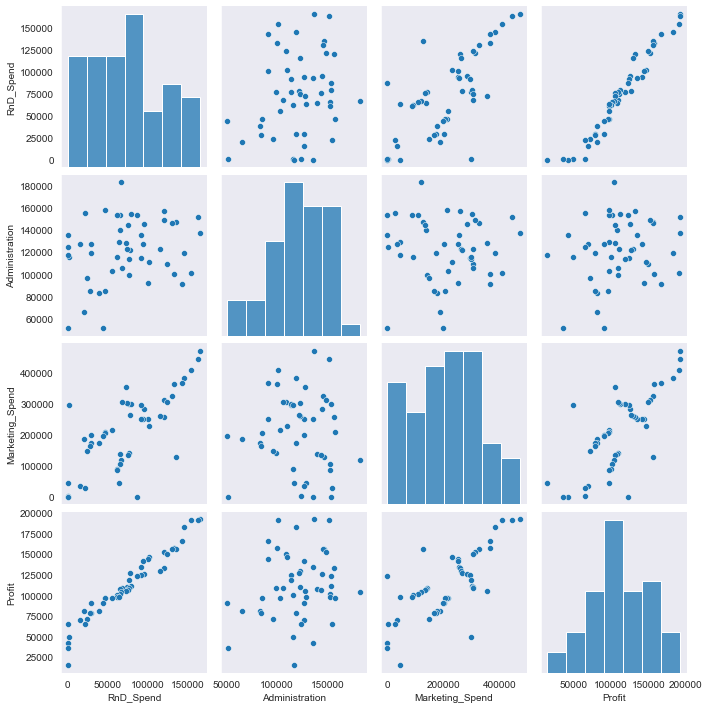

In [8]:
# pairplot for 50 Startups
sns.set_style('dark')
sns.pairplot(startup)

In [9]:
# model building for 50 startups
model = smf.ols('Profit~RnD_Spend+Administration+Marketing_Spend', data=startup).fit()
model

In [10]:
model.params

Intercept          50122.192990
RnD_Spend              0.805715
Administration        -0.026816
Marketing_Spend        0.027228
dtype: float64

In [11]:
print(model.tvalues, '\n', model.pvalues)

Intercept           7.626218
RnD_Spend          17.846374
Administration     -0.525507
Marketing_Spend     1.655077
dtype: float64 
 Intercept          1.057379e-09
RnD_Spend          2.634968e-22
Administration     6.017551e-01
Marketing_Spend    1.047168e-01
dtype: float64


In [12]:
# p-value of Administration and Marketing_Spend are greater than 0.05, there might be collinearity

In [13]:
(model.rsquared,model.rsquared_adj)

(0.9507459940683246, 0.9475337762901719)

In [14]:
# Linear Regresson models

In [15]:
model1 = smf.ols('Profit~Administration', data=startup).fit()
print(model1.tvalues, '\n', model1.pvalues)

Intercept         3.040044
Administration    1.419493
dtype: float64 
 Intercept         0.003824
Administration    0.162217
dtype: float64


In [16]:
model2 = smf.ols('Profit~Marketing_Spend', data=startup).fit()
print(model2.tvalues, '\n', model2.pvalues)

Intercept          7.808356
Marketing_Spend    7.802657
dtype: float64 
 Intercept          4.294735e-10
Marketing_Spend    4.381073e-10
dtype: float64


In [17]:
model3 = smf.ols('Profit~Administration+Marketing_Spend', data=startup).fit()
print(model3.tvalues, '\n', model3.pvalues)

Intercept          1.142741
Administration     2.467779
Marketing_Spend    8.281039
dtype: float64 
 Intercept          2.589341e-01
Administration     1.729198e-02
Marketing_Spend    9.727245e-11
dtype: float64


In [18]:
# from above p-values of Administration+Marketing_Spend it is observed that there is no collinearity, no need to VIF
# but linear regression shows that for Administration p-value is greater than Marketing_Spend

In [19]:
# Residual Analysis  
# resid=error

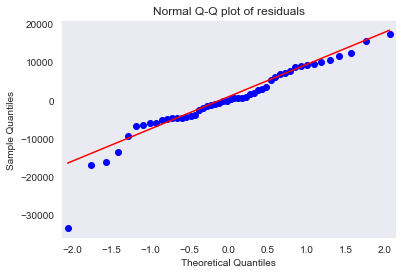

In [20]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [21]:
list(np.where(model.resid>10))

[array([ 1,  2,  3,  8, 10, 11, 12, 13, 16, 19, 20, 25, 28, 30, 34, 35, 36,
        37, 38, 40, 41, 42, 43, 44, 45], dtype=int64)]

In [22]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

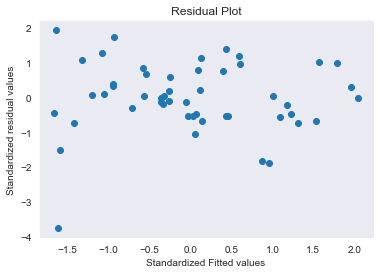

In [23]:
# fittedvalues=predictedvalues
# standerdisation range = -3 to +3

plt.scatter(get_standardized_values(model.fittedvalues),   
            get_standardized_values(model.resid))         

plt.title('Residual Plot')                                 
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

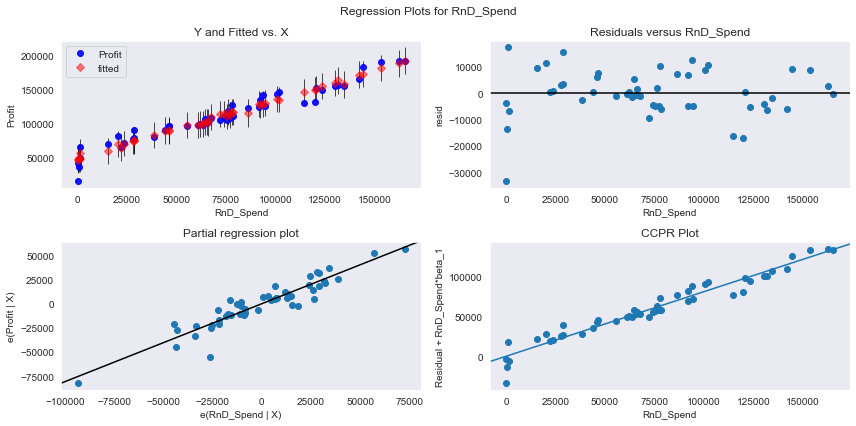

In [24]:
fig = plt.figure(figsize=(12,6))
fig = sm.graphics.plot_regress_exog(model, "RnD_Spend", fig=fig)
plt.show()

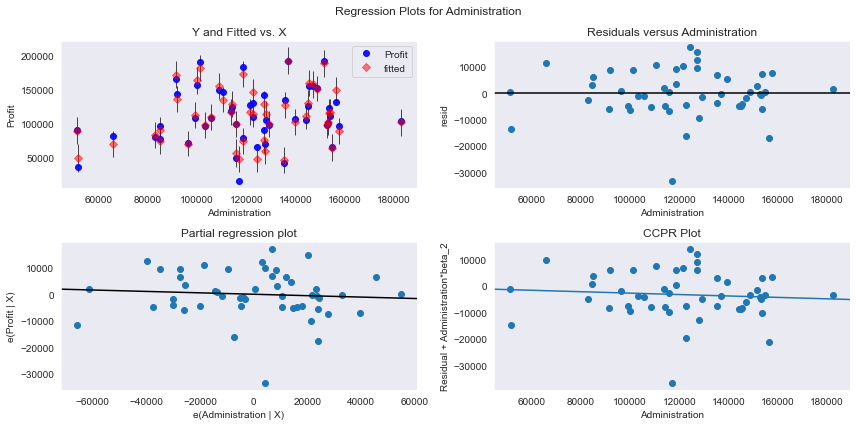

In [25]:
fig = plt.figure(figsize=(12,6))
fig = sm.graphics.plot_regress_exog(model, "Administration", fig=fig)
plt.show()

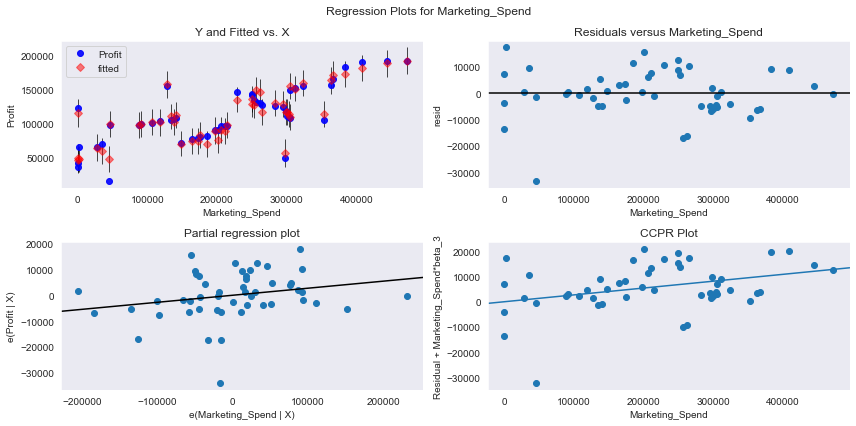

In [26]:
fig = plt.figure(figsize=(12,6))
fig = sm.graphics.plot_regress_exog(model, "Marketing_Spend", fig=fig)
plt.show()

In [27]:
# from above plot it is clear that correlation in Administration is weak

In [28]:
# cooks dist, Detecting Influencers/Outliers, Cooks distance>0.5 says highly influencial
from statsmodels.graphics.regressionplots import influence_plot
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

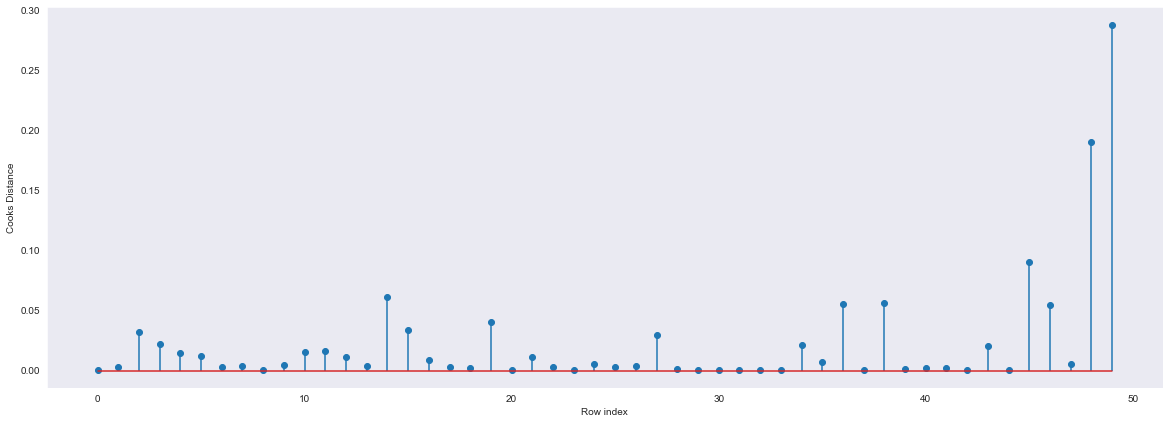

In [29]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(startup_)), np.round(c, 5))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [30]:
# outlier/influencer
(np.argmax(c),np.max(c))

(49, 0.28808229275432584)

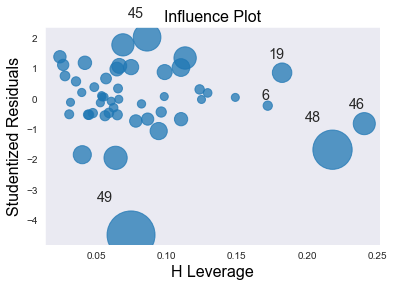

In [31]:
# visualization of outliers
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [32]:
k = startup.shape[1]
n = startup.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.36

In [33]:
# from above visualization the influencers are 49, 48, 46, 45
startup[startup.index.isin([49, 48, 46, 45])]

,RnD_Spend,Administration,Marketing_Spend,State,Profit
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [34]:
# new dataset by removing outlier/influencer
startup_new = startup
startup_new1=startup_new.drop(startup_new.index[[49, 48, 46, 45]],axis=0).reset_index()
startup_new2=startup_new1.drop(['index'],axis=1)
startup_new2.head()

,RnD_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [35]:
# model buiding with Administration and without influencers
final_model_a = smf.ols('Profit~RnD_Spend+Administration+Marketing_Spend', data=startup_new2).fit()

In [36]:
print(final_model_a.tvalues, '\n', final_model_a.pvalues)

Intercept           9.829617
RnD_Spend          19.320035
Administration     -1.254475
Marketing_Spend     1.916138
dtype: float64 
 Intercept          1.869461e-12
RnD_Spend          1.633847e-22
Administration     2.166058e-01
Marketing_Spend    6.217018e-02
dtype: float64


In [37]:
# model building without Administration and influencers
final_model = smf.ols('Profit~RnD_Spend+Marketing_Spend', data=startup_new2).fit()

In [38]:
final_model.params

Intercept          50293.151680
RnD_Spend              0.750722
Marketing_Spend        0.035005
dtype: float64

In [39]:
# R squared value for final_model
(final_model.rsquared,final_model.aic)   

(0.9611920624974509, 949.7556721616616)

In [40]:
print(final_model.tvalues, '\n', final_model.pvalues)

Intercept          20.742615
RnD_Spend          20.510851
Marketing_Spend     2.627151
dtype: float64 
 Intercept          5.098116e-24
RnD_Spend          7.914199e-24
Marketing_Spend    1.188539e-02
dtype: float64


In [41]:
# table for r squared values
table = {'rsquared':['model.rsquared','final_model.rsquared'],'rsquared_val':[model.rsquared,final_model.rsquared]}
r_table=pd.DataFrame(table)
r_table

,rsquared,rsquared_val
0,model.rsquared,0.950746
1,final_model.rsquared,0.961192


# Toyota Corolla

In [42]:
# In python while we upload the data it will be encoded by using default encoding (UtF_8).
# But sometimes files doesnt support that encoding so we use different encoding techniques like iso

In [93]:
toyota = pd.read_csv(('ToyotaCorolla.csv'),encoding='ISO-8859-1')
toyota.head(3)

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0


In [94]:
# as per problem statement select below columns from 38 columns
corolla = toyota.loc[:,["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]
corolla.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [92]:
corolla.isna().sum()

Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

In [46]:
corolla.corr()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
Quarterly_Tax,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


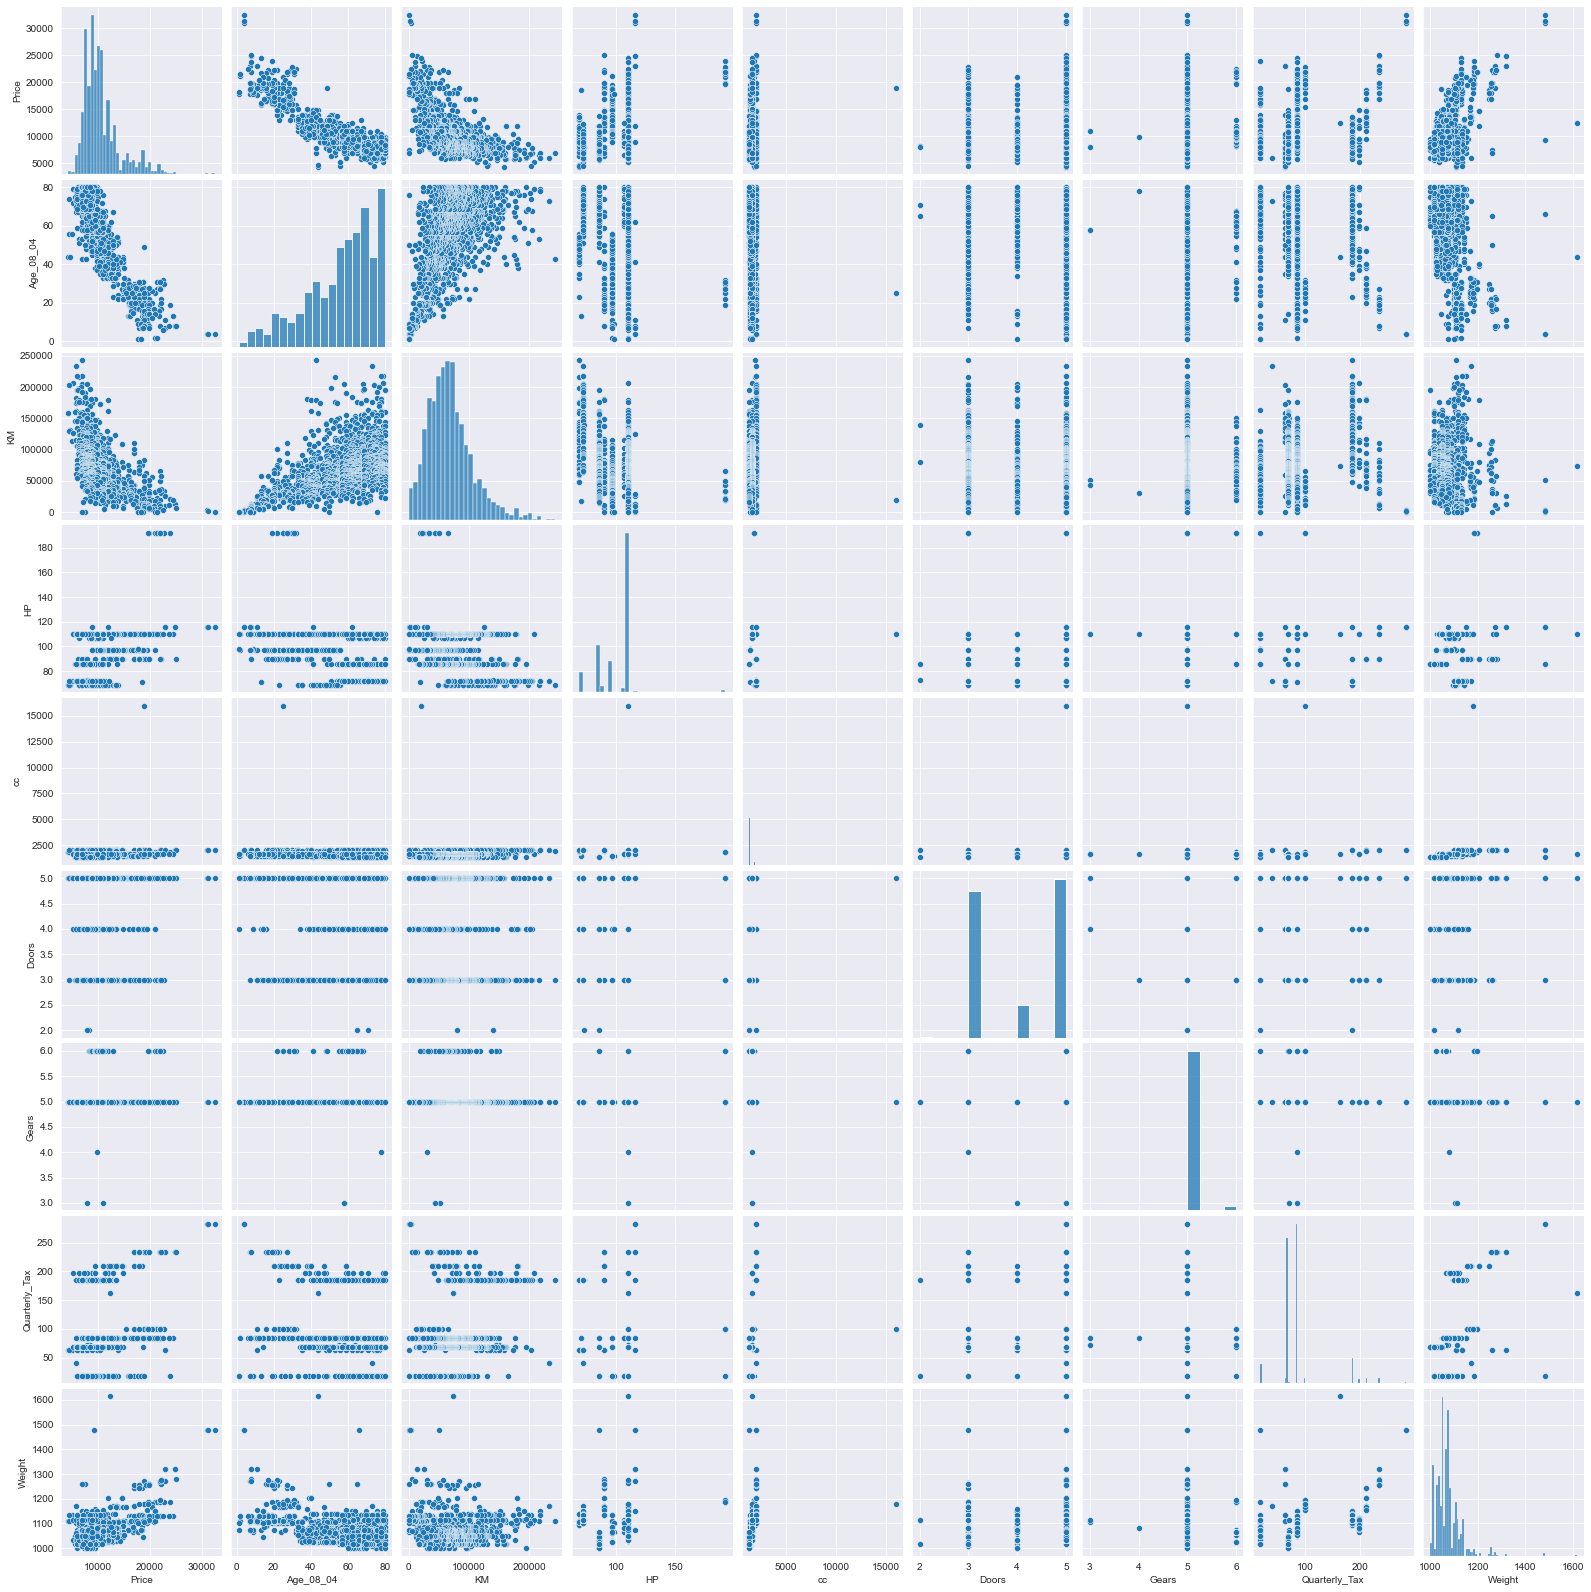

In [47]:
sns.set_style('darkgrid')
sns.pairplot(corolla)

In [48]:
# model building
model_c = smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight', data=corolla).fit()
model_c

In [49]:
model_c.params

Intercept       -5573.106358
Age_08_04        -121.658402
KM                 -0.020817
HP                 31.680906
cc                 -0.121100
Doors              -1.616641
Gears             594.319936
Quarterly_Tax       3.949081
Weight             16.958632
dtype: float64

In [50]:
print(model_c.tvalues, '\n', model_c.pvalues)

Intercept        -3.948666
Age_08_04       -46.511852
KM              -16.621622
HP               11.241018
cc               -1.344222
Doors            -0.040410
Gears             3.016007
Quarterly_Tax     3.014535
Weight           15.879803
dtype: float64 
 Intercept         8.241949e-05
Age_08_04        3.354724e-288
KM                7.538439e-57
HP                3.757218e-28
cc                1.790902e-01
Doors             9.677716e-01
Gears             2.606549e-03
Quarterly_Tax     2.619148e-03
Weight            2.048576e-52
dtype: float64


In [51]:
# p-value of cc and Doors are greater than 0.05, there might be collinearity

In [52]:
(model_c.rsquared,model_c.rsquared_adj)

(0.8637627463428191, 0.8629989775766962)

In [53]:
# Linear Regression models

In [54]:
model_c1 = smf.ols('Price~cc', data=corolla).fit()
print(model_c1.tvalues, '\n', model_c1.pvalues)

Intercept    24.694090
cc            4.824822
dtype: float64 
 Intercept    1.766912e-112
cc            1.550808e-06
dtype: float64


In [55]:
model_c2 = smf.ols('Price~Doors', data=corolla).fit()
print(model_c2.tvalues, '\n', model_c2.pvalues)

Intercept    19.258097
Doors         7.141657
dtype: float64 
 Intercept    1.094732e-73
Doors        1.461237e-12
dtype: float64


In [56]:
model_c3 = smf.ols('Price~cc+Doors', data=corolla).fit()
print(model_c3.tvalues, '\n', model_c3.pvalues)

Intercept    12.620704
cc            4.340400
Doors         6.816153
dtype: float64 
 Intercept    1.056885e-34
cc           1.521992e-05
Doors        1.373469e-11
dtype: float64


In [57]:
# from p-values of LR modeling it is clear that no need to remove cc and doors as there is no collinearity, so no need of VIF

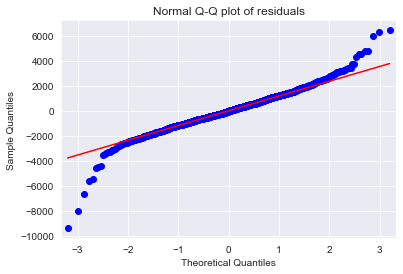

In [58]:
import statsmodels.api as sm
qqplot=sm.qqplot(model_c.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [59]:
list(np.where(model_c.resid>10))

[array([   6,    7,    8,   10,   13,   14,   15,   16,   17,   18,   19,
          20,   21,   22,   23,   24,   26,   27,   28,   29,   32,   35,
          36,   38,   41,   43,   45,   46,   47,   49,   51,   52,   53,
          56,   58,   59,   61,   62,   63,   64,   65,   66,   68,   69,
          70,   72,   74,   75,   76,   77,   78,   80,   81,   83,   84,
          85,   88,   89,   90,   91,   92,   94,   95,   98,   99,  100,
         102,  103,  104,  105,  106,  107,  108,  109,  110,  111,  112,
         113,  114,  115,  116,  118,  119,  120,  121,  123,  125,  126,
         127,  128,  134,  136,  138,  139,  141,  142,  143,  144,  146,
         147,  148,  149,  150,  151,  152,  153,  154,  156,  157,  158,
         159,  160,  161,  162,  163,  165,  166,  167,  168,  169,  170,
         171,  172,  173,  174,  175,  176,  177,  178,  179,  180,  181,
         182,  183,  190,  194,  196,  197,  201,  204,  205,  210,  211,
         216,  223,  230,  232,  233, 

In [60]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

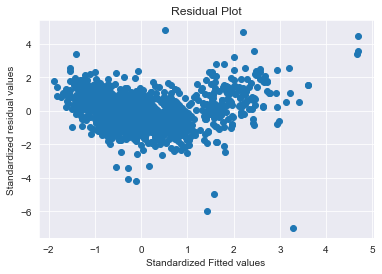

In [61]:
plt.scatter(get_standardized_values(model_c.fittedvalues),   # fittedvalues=predictedvalues
            get_standardized_values(model_c.resid))         

plt.title('Residual Plot')                                 # standerdisation range = -3 to +3
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

In [62]:
corolla.columns

Index(['Price', 'Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Gears',
       'Quarterly_Tax', 'Weight'],
      dtype='object')

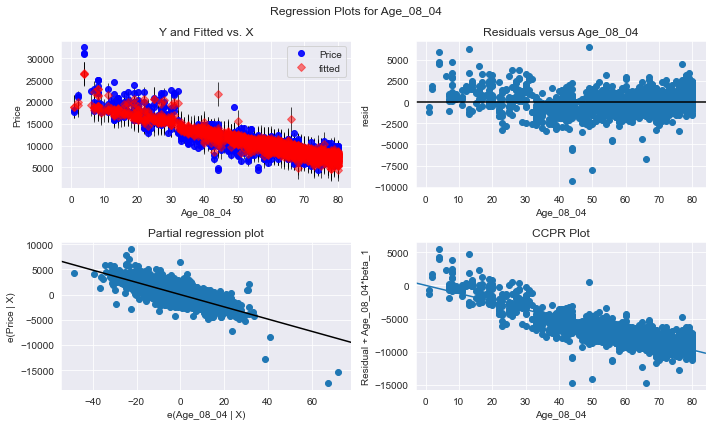

In [63]:
fig = plt.figure(figsize=(10,6))
fig = sm.graphics.plot_regress_exog(model_c, "Age_08_04", fig=fig)
plt.show()

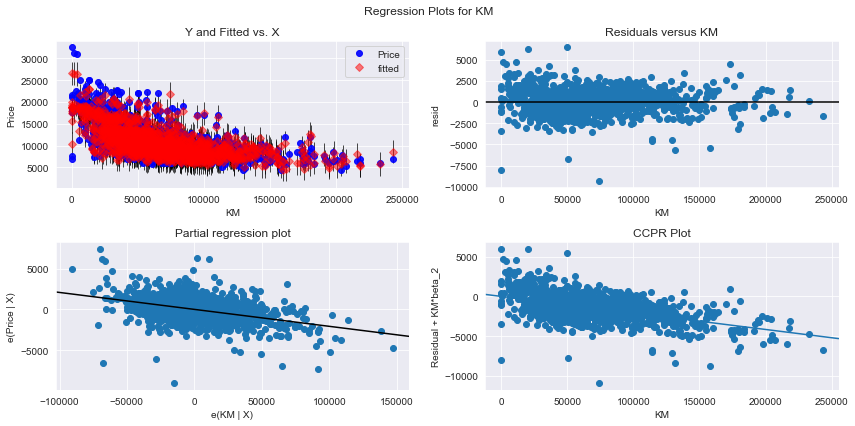

In [64]:
fig = plt.figure(figsize=(12,6))
fig = sm.graphics.plot_regress_exog(model_c, "KM", fig=fig)
plt.show()

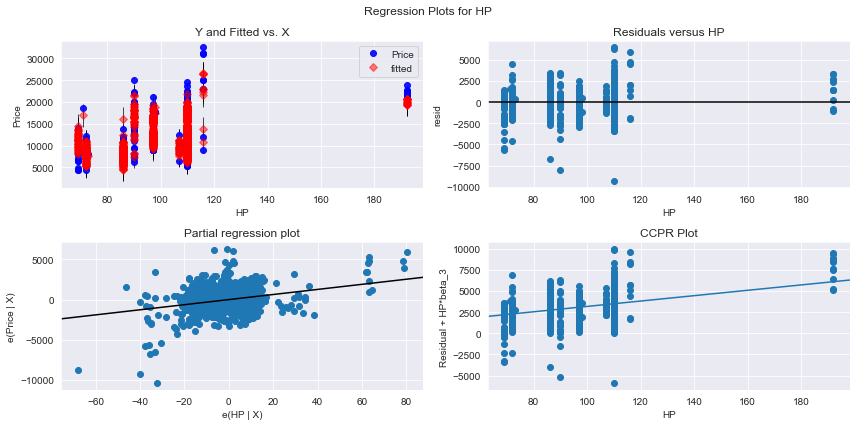

In [65]:
fig = plt.figure(figsize=(12,6))
fig = sm.graphics.plot_regress_exog(model_c, "HP", fig=fig)
plt.show()

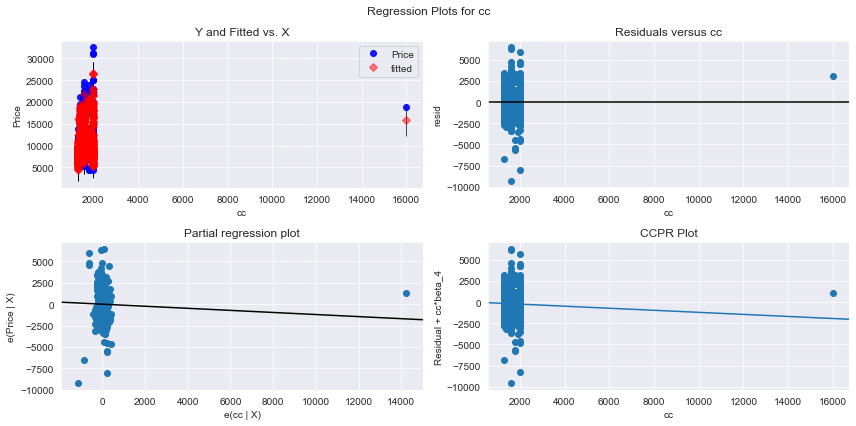

In [66]:
fig = plt.figure(figsize=(12,6))
fig = sm.graphics.plot_regress_exog(model_c, "cc", fig=fig)
plt.show()

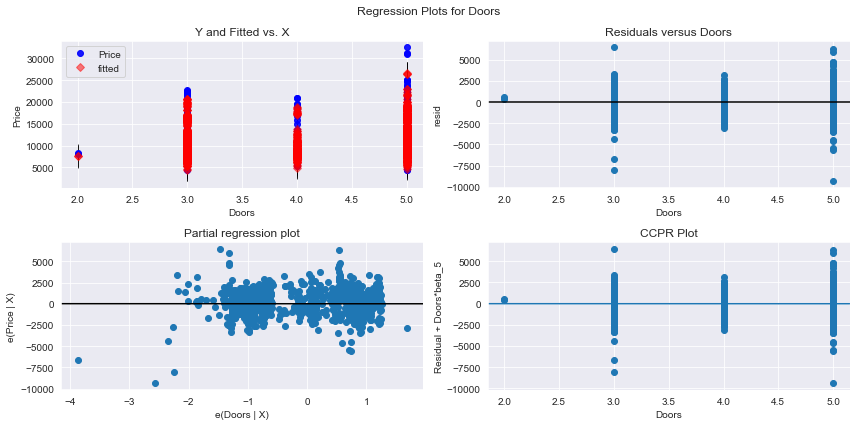

In [67]:
fig = plt.figure(figsize=(12,6))
fig = sm.graphics.plot_regress_exog(model_c, "Doors", fig=fig)
plt.show()

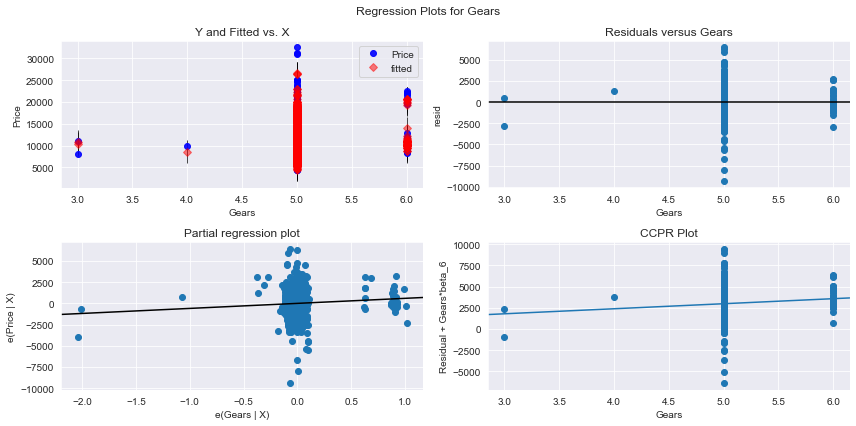

In [68]:
fig = plt.figure(figsize=(12,6))
fig = sm.graphics.plot_regress_exog(model_c, "Gears", fig=fig)
plt.show()

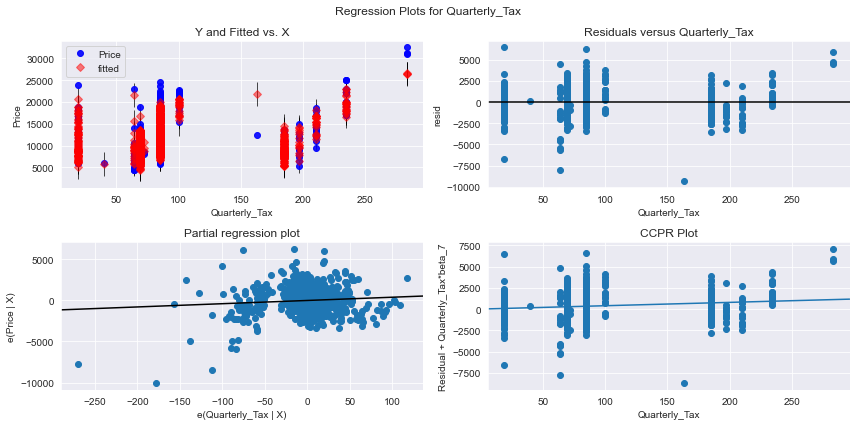

In [69]:
fig = plt.figure(figsize=(12,6))
fig = sm.graphics.plot_regress_exog(model_c, "Quarterly_Tax", fig=fig)
plt.show()

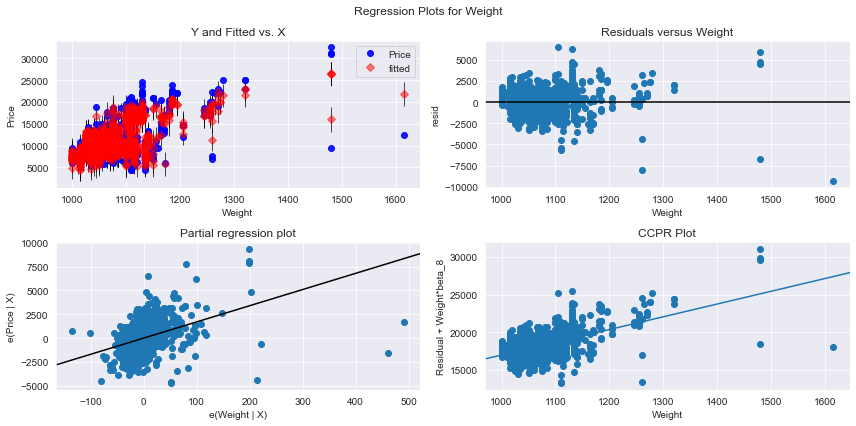

In [70]:
fig = plt.figure(figsize=(12,6))
fig = sm.graphics.plot_regress_exog(model_c, "Weight", fig=fig)
plt.show()

In [71]:
# from above plots it is clear that correlation in Doors is weak

In [72]:
# check the influencers
from statsmodels.graphics.regressionplots import influence_plot
model_c_influence = model_c.get_influence()
(c, _) = model_c_influence.cooks_distance

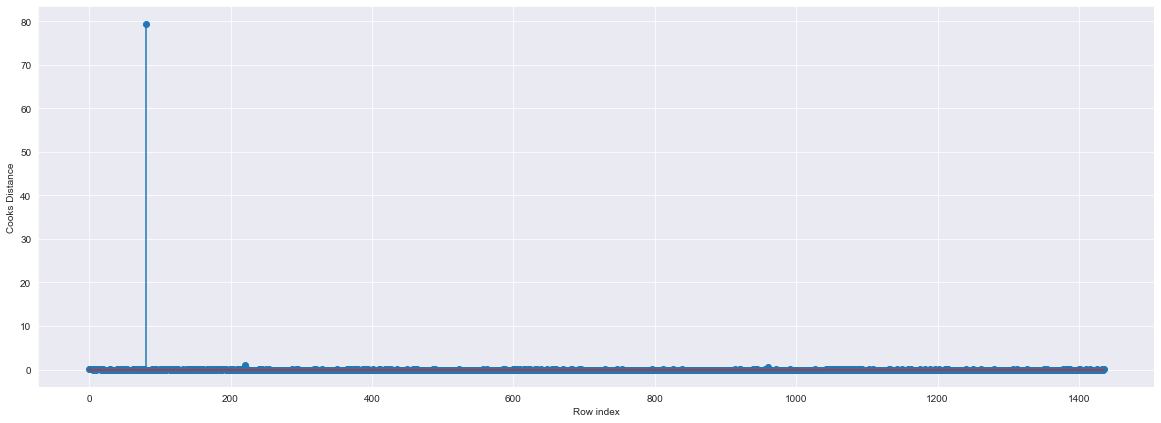

In [73]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(corolla)), np.round(c, 5))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [74]:
(np.argmax(c),np.max(c))

(80, 79.5201062414142)

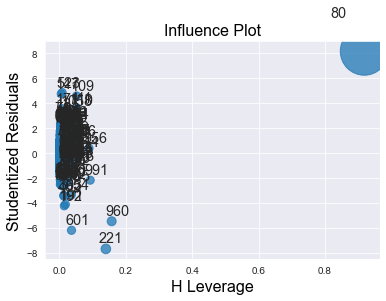

In [75]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model_c)
plt.show()

In [76]:
k = corolla.shape[1]
n = corolla.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.020891364902506964

In [77]:
# influencer/outlier
corolla[corolla.index.isin([80])]

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
80,18950,25,20019,110,16000,5,5,100,1180


In [78]:
# new dataset without influencer
corolla_new = corolla
corolla_new1=corolla_new.drop(corolla_new.index[[80]],axis=0).reset_index()
corolla_new2=corolla_new1.drop(['index'],axis=1)
corolla_new2

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


In [79]:
# model building without Doors and influencer
final_model_c = smf.ols('Price~Age_08_04+KM+HP+cc+Gears+Quarterly_Tax+Weight', data=corolla_new2).fit()   #without Doors
final_model_c

In [80]:
final_model_c.params

Intercept       -6313.939621
Age_08_04        -120.457695
KM                 -0.017894
HP                 39.159255
cc                 -2.506874
Gears             549.731101
Quarterly_Tax       9.075930
Weight             19.962273
dtype: float64

In [81]:
final_model_c.rsquared,final_model_c.rsquared_adj

(0.8693349475698542, 0.8686939837527476)

In [82]:
print(final_model_c.tvalues, '\n', final_model_c.pvalues)

Intercept        -4.569171
Age_08_04       -47.030954
KM              -14.028891
HP               13.511750
cc               -8.188083
Gears             2.905316
Quarterly_Tax     6.374453
Weight           18.547098
dtype: float64 
 Intercept         5.319061e-06
Age_08_04        2.296010e-292
KM                5.564084e-42
HP                3.086498e-39
cc                5.827586e-16
Gears             3.725373e-03
Quarterly_Tax     2.473062e-10
Weight            5.723957e-69
dtype: float64


In [83]:
# crosschecking by considering doors

In [84]:
final_model_tc = smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight', data=corolla_new2).fit()  # consider Doors
final_model_tc

In [85]:
final_model_tc.rsquared,final_model_tc.rsquared_adj

(0.8693790488655818, 0.8686462525057814)

In [86]:
print(final_model_tc.tvalues, '\n', final_model_tc.pvalues)

Intercept        -4.545107
Age_08_04       -47.021323
KM              -13.972555
HP               13.515507
cc               -8.215903
Doors            -0.693871
Gears             2.716621
Quarterly_Tax     6.347531
Weight           18.075652
dtype: float64 
 Intercept         5.954986e-06
Age_08_04        3.232372e-292
KM                1.121552e-41
HP                2.960385e-39
cc                4.674360e-16
Doors             4.878758e-01
Gears             6.674954e-03
Quarterly_Tax     2.933269e-10
Weight            6.409190e-66
dtype: float64


In [87]:
# p-value of Door is greater than 0.05 for new model so it is must to remove Doors

In [88]:
#VIF_corolla
rsq_Age_08_04 = smf.ols('Age_08_04~KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=corolla).fit().rsquared  
vif_Age_08_04 = 1/(1-rsq_Age_08_04) # 16.33

rsq_KM = smf.ols('KM~Age_08_04+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=corolla).fit().rsquared  
vif_KM = 1/(1-rsq_KM) # 564.98

rsq_HP = smf.ols('HP~Age_08_04+KM+cc+Doors+Gears+Quarterly_Tax+Weight',data=corolla).fit().rsquared  
vif_HP = 1/(1-rsq_HP) #  564.84

rsq_cc = smf.ols('cc~Age_08_04+HP+KM+Doors+Gears+Quarterly_Tax+Weight',data=corolla).fit().rsquared  
vif_cc = 1/(1-rsq_cc) #  16.35

rsq_Doors = smf.ols('Doors~Age_08_04+HP+cc+KM+Gears+Quarterly_Tax+Weight',data=corolla).fit().rsquared  
vif_Doors = 1/(1-rsq_Doors) #  16.35

rsq_Gears = smf.ols('Gears~Age_08_04+HP+cc+Doors+KM+Quarterly_Tax+Weight',data=corolla).fit().rsquared  
vif_Gears = 1/(1-rsq_Gears) # 564.98

rsq_Quarterly_Tax = smf.ols('Quarterly_Tax~Age_08_04+HP+cc+Doors+Gears+KM+Weight',data=corolla).fit().rsquared  
vif_Quarterly_Tax = 1/(1-rsq_Quarterly_Tax) # 564.98

rsq_Weight = smf.ols('Weight~Age_08_04+HP+cc+Doors+Gears+Quarterly_Tax+KM',data=corolla).fit().rsquared  
vif_Weight = 1/(1-rsq_Weight) # 564.98

# Storing vif values in a data frame
d1 = {'Variables':['Age_08_04','KM','HP','cc','Doors','Gears','Quarterly_Tax','Weight'],'VIF':[vif_Age_08_04,vif_KM,vif_HP,vif_cc,vif_Doors,vif_Gears,vif_Quarterly_Tax,vif_Weight]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,Age_08_04,1.884620
1,KM,1.756905
2,HP,1.419422
3,cc,1.163894
4,Doors,1.156575
5,Gears,1.098723
6,Quarterly_Tax,2.311431
7,Weight,2.516420
